# Week 9

**Online Resources:**
- [Machine Learning Course by Andrew Ng](https://www.coursera.org/learn/machine-learning)
- [Applied Machine Learning Course at Columbia](https://www.cs.columbia.edu/~amueller/comsw4995s19/schedule/)
- [Machine Learning A-Z](https://www.udemy.com/course/machinelearning/)
- [Google ML Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro)


# Chapter 6 Decision Trees
The *decision tree* model performs classification and regression by segment the predictor space into a number of decision regions with simple rules. This method is simple and useful for interpretation, and it is the building block of a very popular method called *random forests*.

## Model Intuition
People may ask the following questions in order to find out if a person is fit or unfit:
1. Are you less than 30 years old?
2. If yes, do you eat pizza more than once a week?
3. If no, do you exercise more than 2 hours a week?
Based on the responde, we can form a tree diagram to express the prediction:
<img src="https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc" width="600">

## An Example: Will John Plays Tennis?
<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/DT_1.png">

- It is hard to see how existing data can help us making decisions on new data
- Split cases according to the outlook

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/DT_3.png">

- John played tennis in overcast weather
- If it is sunny or rainy, John's decision depends on other factors as well.
- Split this group further by humidity

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/DT_4.png">

- If it was sunny with high humidity, John never played tennis
- If it was sunny with normal humidity, John always played tennis
- Split rainy group by wind strength

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/DT_5.png">

- If it was rainy with strong wind, John never player tennis
- If it was rainy with weak wind, John always played tennis
- **What can we say about the new data?**

## Decision Tree Algorithm
- Choose the best feature for splitting the data into subsets
- If a subset is pure: stop
- If a subset is impure: repeat

**Question: How should we determine which feature to choose?** How to measure the impurity of a subset?

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/DT_6.png">

- The measurement should clearly distinguish the pure case (100% for one outcome) and the completely uncertain case (50% - 50%)
- The measurement should be symmetric: (4 yes / 0 no) is just as good as (0 yes / 4 no)

## Feature Selection: Use Gini Impurity as measurement

For each subset:
- Let $p_{yes}$ be the probability of a randomly chosen case in the subset to be a yes. 
- Let $p_{no}$ be the probability of a randomly chosen case in the subset to be a no
- The **Gini impurity** of this subset is calculated as

$G = 1 - p_{yes}^2 - p_{no}^2$

**Example:**
- If a set contains 2 yes and 3 no, then the probability of yes is $p_{yes} = 2 / 5 = 0.4$, and the probability of no is $p_{no} = 3 / 5 = 0.6$.
- The Gini impurity measurement is $G = 1 - 0.4^2 - 0.6^2 = 0.48$.
- If a set contains 4 yes and 0 no, then $p_{yes} = 4 / 4 = 1.0$, $p_{no} = 0 / 4 = 0$.
- The Gini impurity is $G = 1 - 1^2 - 0^2 = 0$.

In [1]:
1 - 0.4 ** 2 - 0.6 ** 2

0.48

**Discussion**: 
- What is the minimal value for Gini impurity? 
Ans: 0.
- What subsets have minimal Gini impurity? 
Ans: if a set only contains one type of instances, then its Gini impurity will be 0.
- What is the maximal value for Gini impurity?
Ans: In binary case, the maximal value is 1 - 1/4 - 1/4 = 1/2. In n-class case, the maximal value is 1 - (1/n)^2 * n = (n-1)/n.
- What kind of sets have maximal Gini impurity?
Ans: A set has maximal Gini impurity if and only if all probabilities are equal.
- Does (4 yes / 0 no) has the same Gini impurity as (0 yes / 4 no)?
Ans: Yes, the class labels do not matter.

For example, in the "Sunny" subset there are 2 yes and 3 no, so a randomly chosen case is yes with probability $2 / 5 = 0.4$, and it is no with probability $3 / 5 = 0.6$. Its Gini impurity is 

$G_{sunny} = 1 - 0.4^2 - 0.6^2 = 0.48$.

- Gini impurity for "Overcast":$G_{overcast}=1 - 1^2 = 0$
- Gini impurity for "Rain":$G_{rain}=1 - 0.6^2 - 0.4^2 = 0.48$

The overall cost of using "Outlook" to split the data is a weighted sum of all Gini impurities:

$J(outlook) = \frac{m_{sunny}}{m}G_{sunny} + \frac{m_{overcast}}{m}G_{overcast} + \frac{m_{rain}}{m}G_{rain}=\frac{5}{14}\times 0.48 + \frac{4}{14}\times 0 + \frac{5}{14}\times 0.48 = 0.3429$

Here $m_{subset}$ is the number of instances in the subset, m is the total number of instances.

Next, compute the cost of using "Wind" to split the data:
- Gini impurity for "Weak": $G_{weak} = 1 - 0.75^2 - 0.25^2 = 0.375$
- Gini impurity for "Strong": $G_{strong} = 1 - 0.5^2 - 0.5^2 = 0.5$
- $J(wind) = \frac{8}{14}G_{weak} + \frac{6}{14}G_{strong}= 0.4286$

**Conclusion**: Outlook splits the dataset better.

## Feature Selection: Use entropy as measurement
For each subset, its **entropy** is calculates as

$H = -p_{yes}\log(p_{yes}) - p_{no}\log(p_{no})$. 

Note that $log(p)$ is undefined if $p=0$. In this case we let $p\log(p)=0$.

**Discussion**: 
- What is the minimal value for entropy?
Ans: 0
- What subsets have minimal entropy? 
Ans: Pure sets.
- What is the maximal value for entropy?

- What subsets have maximal entropy?
Ans: when instances are equally distributed among all classes.
- Does (4 yes / 0 no) have the same entropy as (0 yes / 4 no)?
Ans: Yes.

- $H_{sunny} = -0.4\times\log(0.4) - 0.6\times\log(0.6) = 0.2923$
- $H_{overcast} = -1\times\log(1) - 0\times\log(0) = 0$
- $H_{rain} = -0.6\times\log(0.6) - 0.4\times\log(0.4)=0.2923$.
- The overall cost of "Outlook" is a weighted sum of all entropies:

$J(outlook) = \frac{m_{sunny}}{m}H_{sunny} + \frac{m_{overcast}}{m}H_{overcast} + \frac{m_{rain}}{m}H_{rain}=\frac{5}{14}\times 0.2923 + \frac{4}{14}\times 0 + \frac{5}{14}\times 0.2923 = 0.2088$

## Building A Decision Tree: Classification of Iris flowers

Recall that this is a dataset of 150 records under 5 attributes - petal length, petal width, sepal length, sepal width, and class. The goal of this classification task is to predict the class of each flower based on the other four attributes.

<img src="https://miro.medium.com/max/2550/1*7bnLKsChXq94QjtAiRn40w.png">

In [4]:
# Train a decision tree on petal length and width
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']
print(iris['target_names'])
data.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


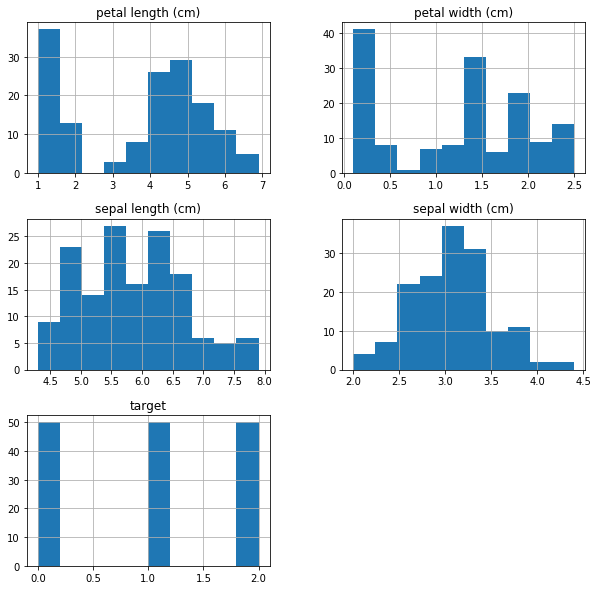

In [7]:
data.hist(figsize=(10, 10))
plt.show()

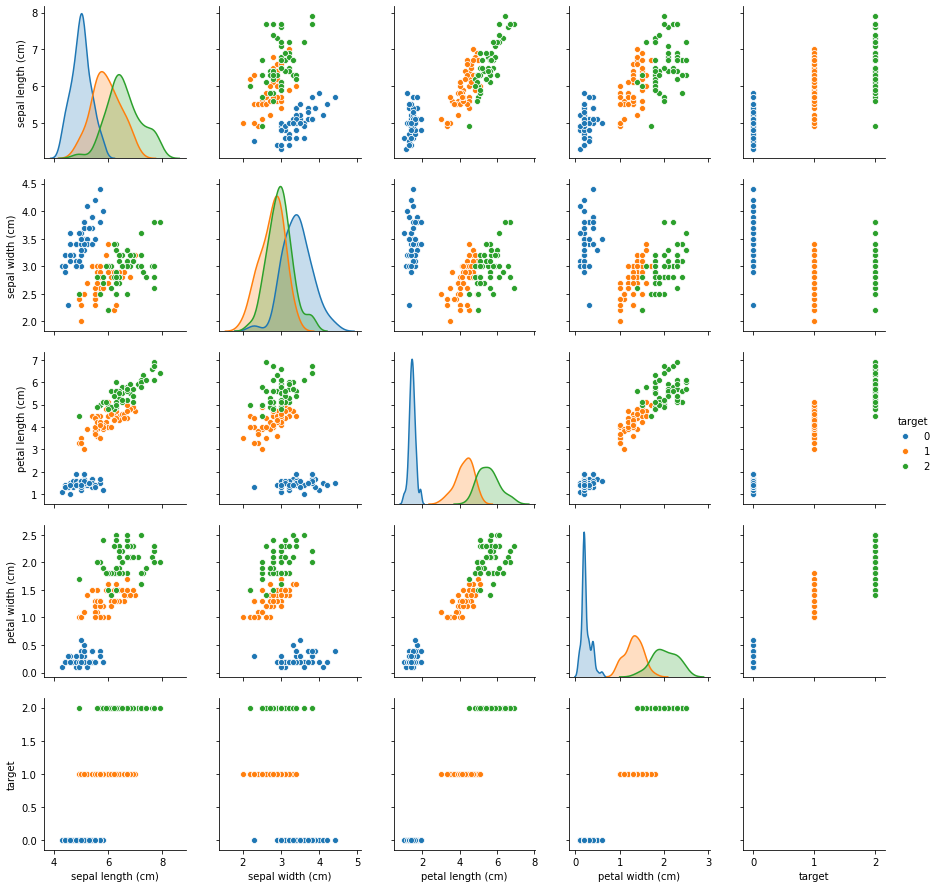

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue="target")

In [10]:
# Build a decision tree
from sklearn.tree import DecisionTreeClassifier

X = data.iloc[:, :4]
y = data['target']
tree_clf = DecisionTreeClassifier(max_depth=2,
                                  random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

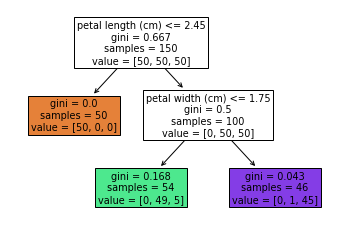

In [11]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plot_tree(tree_clf, feature_names=X.columns, filled=True)
plt.show()

Let's build a model using petal length and petal width, so that we can visualize its decision boundary

In [0]:
X2 = data.iloc[:, 2:4]
tree_clf2 = DecisionTreeClassifier(max_depth=2,
                                  random_state=42)
tree_clf2.fit(X2, y)
plot_tree(tree_clf2, feature_names=X.columns, filled=True)
plt.show()

NameError: ignored

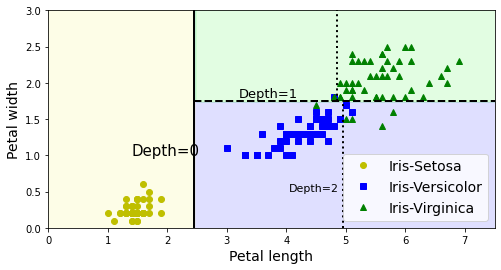

In [0]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,
                           X,
                           y,
                           axes=[0, 7.5, 0, 3]):
    
    # Create a grid of points
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    # Use numpy.ravel() to flatten x1 and x2
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Use classifier to obtain predictions on X_new 
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # Pick three colors representing classes
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    # Use contourf() to draw classification areas
    plt.contourf(x1,
                 x2,
                 y_pred,
                 alpha=0.3,
                 cmap=custom_cmap)
    
    # plot training instances
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    plt.axis(axes)
        
    # Display label and legends
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf2, X2.values, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)

plt.show()

### Discussion
Decision trees make very few assumptions about the training data. If left unconstrained, the tree structure will adapt itself to overfitting the training data. Thus it is necessary to use hyperparameters to restrict the shape of Decision tree.
- max_depth: the maximal depth of the decision tree
- min_sample_split: the minimum number of samples a node must have before it can split
- min_samples_leaf: the minimum number of samples a leaf node must have
- min_weight_fraction_leaf: the minimum fraction of samples a leaf node must have
- max_leaf_nodes: the maximum number of leaf nodes
- max_features: the maximum number of features evaluated at each node

Increasing min_* or reducing max_* will reduce overfitting.
<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/DT_8.png">

## Regression Trees
Decision trees are also capable of performing regression tasks. The main differences are:
- Instead of predicting a class in each node, it predicts a value
- Gini impurity and entropy are no longer viable choices for cost function. A common choice is MSE (mean-squared-error) or MAE (mean-absolute-error) function.

In [0]:
import numpy as np

In [0]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

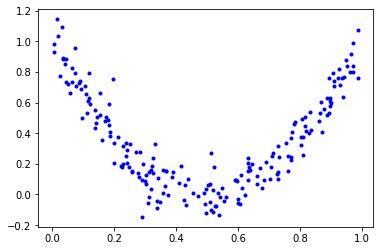

In [0]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

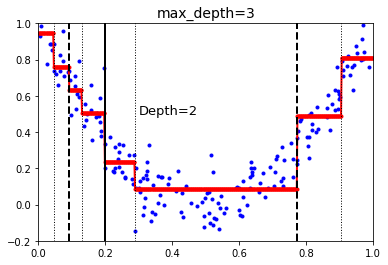

In [0]:
def plot_regression_predictions(tree_reg,
                                X,
                                y,
                                axes=[0, 1, -0.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2)

plot_regression_predictions(tree_reg, X, y)

# Draw decision boundaries
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.show()

## Pitfalls of Decision Trees
- Overfitting
- Extrapolation
- Instability
- Categorical Variables
- Missing value imputation

## Random Forest: A Ensemble of Decision Trees
- Train multiple decision trees separatedly.
- For each split, only consider a random subset of all available features.
- Let all trees vote to get the final prediction.

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=500,
    max_depth=2,
    n_jobs=-1
)
rf_clf.fit(X2, data['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

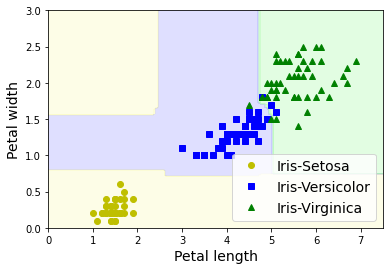

In [0]:
plot_decision_boundary(rf_clf, X2.values, data['target'])